## 0.导包

In [65]:
import numpy as np
import matplotlib.pyplot as plt

## 1.导入数据

In [66]:
data = np.genfromtxt('data.csv',delimiter = ',')#1为文件路径   2为分隔符
x = data[:,0]
y = data[:,1]

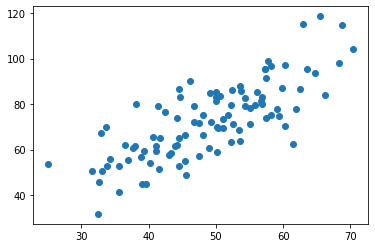

In [67]:
plt.scatter(x,y)
plt.show()

## 2.定义损失函数

In [68]:
def compute_cost(w,b,data):
    sum_cost = 0
    
    for i in range(len(data)):
        sum_cost += (data[i,1] - w * data[i,0] -b) **2
        
    return sum_cost / len(data)

## 3.定义模型的全局参数（步长alpha，初始值init_w、init_b，迭代次数num_iter）

In [69]:
alpha = 0.0001
init_w = 0
init_b = 0
num_iter = 10

## 4.定义核心梯度下降算法

In [70]:
def grad_desc(alpha, init_w, init_b, num_iter, data):
    w = init_w
    b = init_b
    #定义一个列表保存所有的损失函数值，用来显示下降的过程
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w, b, data))
        w , b = step_grad_desc( w , b , alpha , data )
        
    return [w,b,cost_list]


def step_grad_desc( current_w ,current_b , alpha , data ):
    sum_grad_w = 0
    sum_grad_b = 0
    m = len(data)
    
    #对每个点带入求和
    for i in range(m):
        x = data[i,0]
        y = data[i,1]
        sum_grad_w  += (current_w * x + current_b - y ) * x
        sum_grad_b  += (current_w * x + current_b - y )
    
    #用公式求当前梯度
    grad_w = 2/m * sum_grad_w
    grad_b = 2/m * sum_grad_b
    
    #梯度下降，更新当前的w,b
    updata_w = current_w - alpha * grad_w
    updata_b = current_b - alpha * grad_b
    
    return updata_w , updata_b

## 5.测试：运行梯度下降算法计算最优的w和b

1.4774173755483797
0.02963934787473238
112.65585181499748


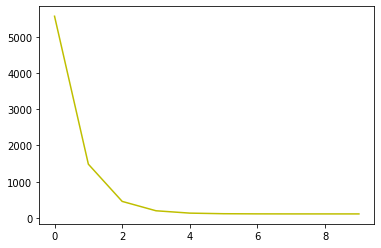

In [71]:
w,b,cost_list = grad_desc(alpha, init_w, init_b, num_iter, data)
print(w)
print(b)

cost = compute_cost(w,b,data)
print(cost)

plt.plot(cost_list , c = 'y')
plt.show()

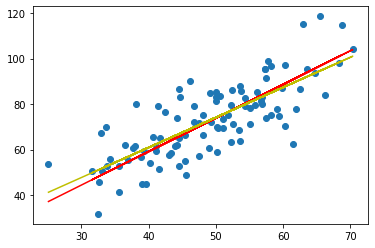

In [72]:
#散点图
plt.scatter(data[:,0],data[:,1])

#梯度下降的一元线性回归图
pred_y = w*data[:,0] + b
plt.plot(data[:,0],pred_y,c = 'r')

#最小二乘的一元线性回归图
w = 1.3224310227553846
b = 7.991020982269173
plt.plot( data[:,0], w*data[:,0]+b , c = 'y')
plt.show()